C:\Users\Minseok\AppData\Local\Temp\ipykernel_51956\2141732278.py:62: UserWarning: frames=<generator object insertion_sort at 0x0000021213C46560> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, frames=generator, interval=300, repeat=False)


C:\Users\Minseok\anaconda3\Lib\site-packages\matplotlib\animation.py:1719: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


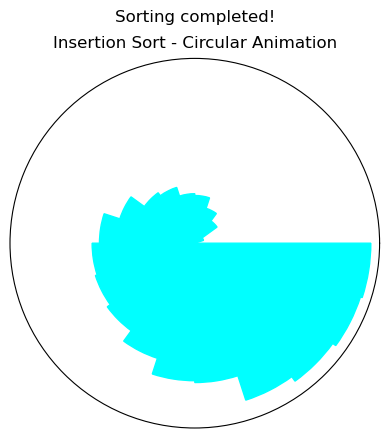

In [13]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import random
from IPython.display import HTML

# 무작위 데이터 생성
def generate_data(n=20, max_val=100):
    return [random.randint(1, max_val) for _ in range(n)]

# 삽입 정렬 애니메이션용 generator
def insertion_sort(data):
    n = len(data)
    for i in range(1, n):
        key = data[i]
        j = i - 1
        yield data, j + 1, j, i, f"Starting to insert {key} at position {i}"  # 현재 비교 상태
        while j >= 0 and data[j] > key:
            data[j + 1] = data[j]
            j -= 1
            yield data, j + 1, j, i, f"Comparing and moving {data[j + 1]}"  # 삽입 작업
        data[j + 1] = key
        yield data, j + 1, -1, i, f"Inserted {key} at position {j + 1}"  # 삽입 완료
    yield data, -1, -1, -1, "Sorting completed!"  # 정렬 완료

# 데이터 생성
data = generate_data()

# 시각화 준비
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
angles = np.linspace(0, 2 * np.pi, len(data), endpoint=False)
bars = ax.bar(angles, data, width=2 * np.pi / len(data), align='edge', color='limegreen')
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Insertion Sort - Circular Animation", va='bottom')

# 정렬 상태를 보여줄 텍스트 추가
status_text = ax.text(0.5, 1.1, "", transform=ax.transAxes, ha="center", fontsize=12)

# 업데이트 함수
def update(frame):
    current_data, min_idx, j, i, status = frame
    for idx, (bar, value) in enumerate(zip(bars, current_data)):
        bar.set_height(value)
        if idx < i:  # 정렬된 부분
            bar.set_color("blue")
        elif idx == min_idx:  # 삽입 위치
            bar.set_color("yellow")
        elif idx == j:  # 현재 비교 중인 데이터
            bar.set_color("red")
        else:
            bar.set_color("limegreen")
    status_text.set_text(status)  # 현재 상태 업데이트

    # 정렬 완료 상태 표시
    if min_idx == -1 and j == -1 and i == -1:
        for bar in bars:
            bar.set_color("cyan")  # 정렬 완료 시 색상 변경

# 애니메이션 실행
generator = insertion_sort(data[:])
ani = FuncAnimation(fig, update, frames=generator, interval=300, repeat=False)

# 애니메이션 출력
HTML(ani.to_html5_video())
